<a href="https://colab.research.google.com/github/makarun99/KSVD/blob/main/%D0%91%D0%B0%D0%B1%D0%B8%D1%87_hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark




In [7]:
from pyspark.sql import SparkSession

# Створення Spark сесії
spark = SparkSession.builder.appName("Cruise Analysis").getOrCreate()

# Завантаження CSV у DataFrame
df = spark.read.csv("/content/cruise_dataset.csv", header=True, inferSchema=True)

# Перегляд схеми
df.printSchema()

# Показ перших 5 рядків
df.show(5)


root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|  

In [8]:
# Загальні статистики
df.describe().show()

# Групування по круїзній компанії
df.groupBy("Cruise_line").count().show()

# Сортування за тоннажем
df.orderBy("Tonnage", ascending=False).show(5)

# Обчислення середніх значень
from pyspark.sql.functions import avg
df.groupBy("Cruise_line").agg(avg("Tonnage").alias("avg_tonnage")).orderBy("avg_tonnage", ascending=False).show()


+-------+---------+-----------+------------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+
|summary|Ship_name|Cruise_line|               Age|           Tonnage|       passengers|           length|            cabins|passenger_density|             crew|
+-------+---------+-----------+------------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+
|  count|      158|        158|               158|               158|              158|              158|               158|              158|              158|
|   mean| Infinity|       NULL|15.689873417721518| 71.28467088607599|18.45740506329114|8.130632911392404| 8.830000000000005|39.90094936708861|7.794177215189873|
| stddev|     NULL|       NULL| 7.615691058751413|37.229540025907866|9.677094775143416|1.793473548054825|4.4714172221480615| 8.63921711391542|3.503486564627034|
|    min|Adventure|    Azamara|   

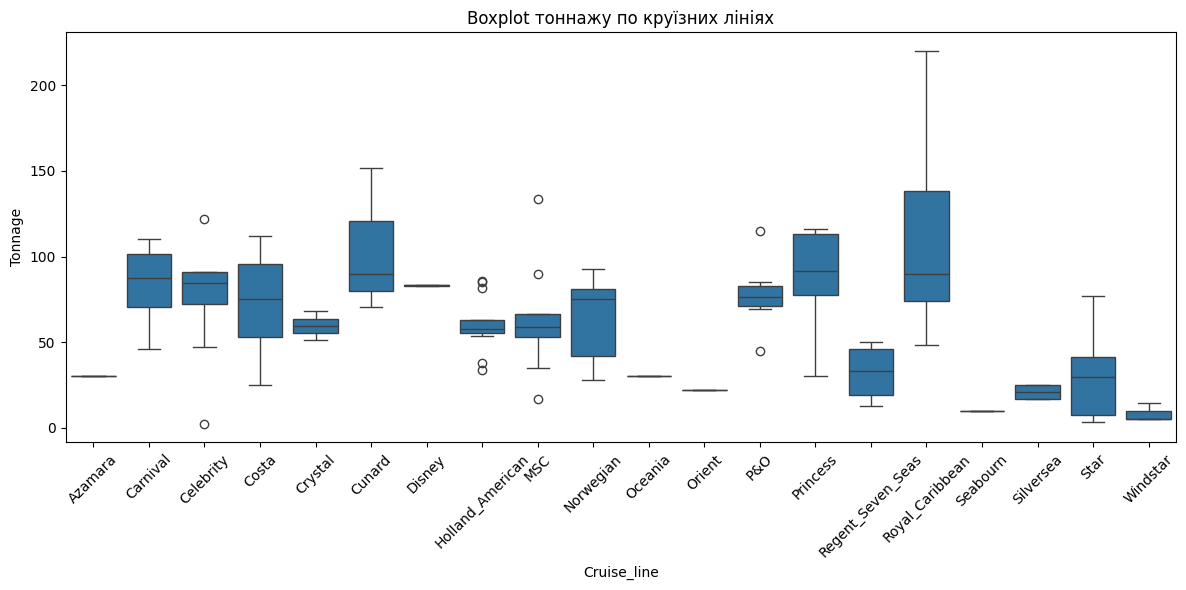

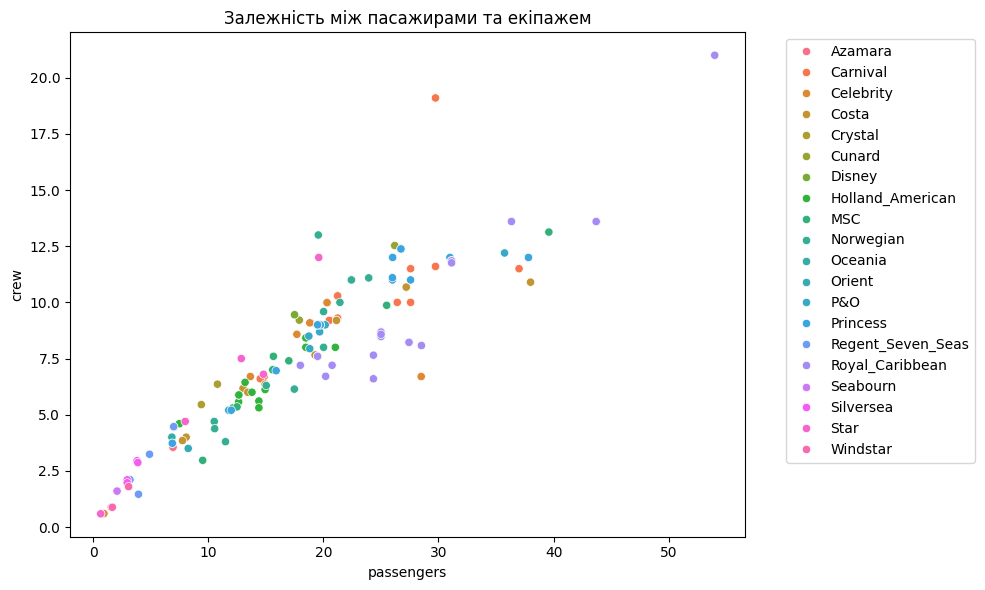

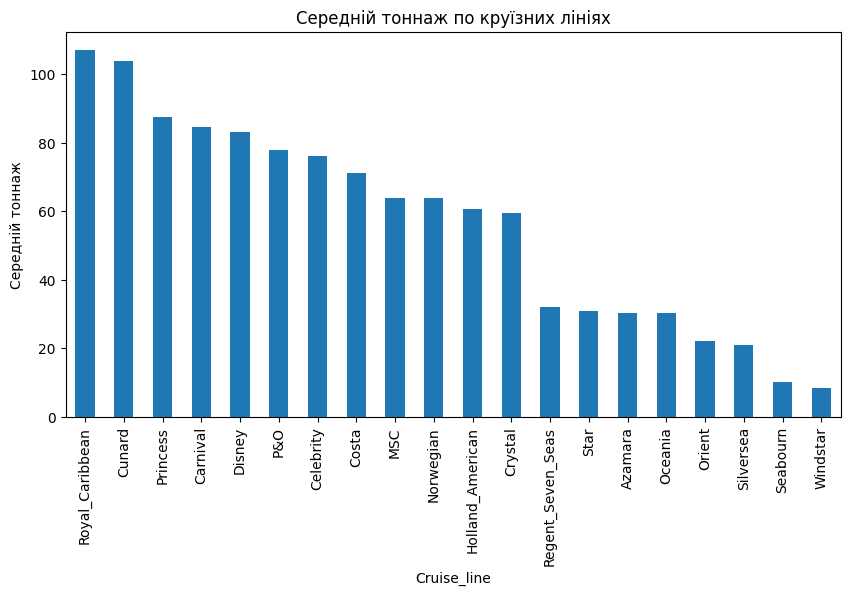

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Конвертація в Pandas DataFrame
df_pd = df.toPandas()

# 1. Boxplot тоннажу по круїзних лініях
plt.figure(figsize=(12,6))
sns.boxplot(x="Cruise_line", y="Tonnage", data=df_pd)
plt.title("Boxplot тоннажу по круїзних лініях")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Scatter plot: пасажири vs. екіпаж
plt.figure(figsize=(10,6))
sns.scatterplot(x="passengers", y="crew", hue="Cruise_line", data=df_pd)
plt.title("Залежність між пасажирами та екіпажем")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Bar chart: середній тоннаж по круїзних лініях
avg_tonnage = df_pd.groupby("Cruise_line")["Tonnage"].mean().sort_values(ascending=False)
avg_tonnage.plot(kind='bar', title="Середній тоннаж по круїзних лініях", figsize=(10,5))
plt.ylabel("Середній тоннаж")
plt.show()
